## Task 1
Question 1

In [1]:
import torch
import numpy as np

# Set seed for reproducibility
np.random.seed(45)

# Generate dataset
num_samples = 40
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3 * x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

# Convert numpy arrays to torch tensors
x1_tensor = torch.tensor(x1, dtype=torch.float32, requires_grad=False)
y_tensor = torch.tensor(y, dtype=torch.float32, requires_grad=False)

# t0=int(input("Enter value of theta0: "))
# t1=int(input("Enter value of theta1: "))

t0 =0
t1 =0
# Initialize parameters (theta0 and theta1)
theta0 = torch.tensor(t0, dtype=torch.float32, requires_grad=True)
theta1 = torch.tensor(t1, dtype=torch.float32, requires_grad=True)

# Define the linear model
def linear_model(x, theta0, theta1):
    return theta1 * x + theta0

# Define the loss function (Mean Squared Error)
def compute_loss(predictions, targets):
    return torch.mean((predictions - targets) ** 2)

# Perform forward pass
predictions = linear_model(x1_tensor, theta0, theta1)
loss = compute_loss(predictions, y_tensor)

# Compute gradients
loss.backward()

# Print gradients
print("Gradient of loss w.r.t theta0:", theta0.grad.item())
print("Gradient of loss w.r.t theta1:", theta1.grad.item())


Gradient of loss w.r.t theta0: -7.447054386138916
Gradient of loss w.r.t theta1: -1.0253016948699951


Question 2


In [2]:

# Initialize lists to store gradients
gradients_theta_0 = []
gradients_theta_1 = []

# Calculate stochastic gradients for each data point
for i in range(num_samples):
    # Extract the i-th data point
    x1_i = x1_tensor[i]
    y_i = y_tensor[i]

    # Create tensors for θ0 and θ1 with requires_grad=True for each point
    theta_0 = torch.tensor(t0, dtype=torch.float32, requires_grad=True)
    theta_1 = torch.tensor(t1, dtype=torch.float32, requires_grad=True)

    # Compute the prediction
    y_pred_i = theta_1 * x1_i + theta_0

    # Compute the loss for this data point (MSE)
    loss_i = (y_pred_i - y_i) ** 2

    # Compute gradients
    loss_i.backward()

    # Store gradients
    gradients_theta_0.append(theta_0.grad.item())
    gradients_theta_1.append(theta_1.grad.item())

# Compute average gradients
avg_gradient_theta_0 = np.mean(gradients_theta_0)
avg_gradient_theta_1 = np.mean(gradients_theta_1)

# Print the results
print(f"Average Stochastic Gradient w.r.t. θ0: {avg_gradient_theta_0}")
print(f"Average Stochastic Gradient w.r.t. θ1: {avg_gradient_theta_1}")

# The true gradient should be printed from the previous step
print(f"True Gradient w.r.t. θ0: ", theta0.grad.item())
print(f"True Gradient w.r.t. θ1: ", theta1.grad.item())


Average Stochastic Gradient w.r.t. θ0: -7.4470539569854735
Average Stochastic Gradient w.r.t. θ1: -1.0253017988055944
True Gradient w.r.t. θ0:  -7.447054386138916
True Gradient w.r.t. θ1:  -1.0253016948699951


## Question 3

Average Full-batch GD converged in 1315.00 iterations and 1316.00 epochs
Average Mini-batch GD converged in 2075.60 iterations and 518.90 epochs
Average SGD converged in 4152.00 iterations and 103.80 epochs


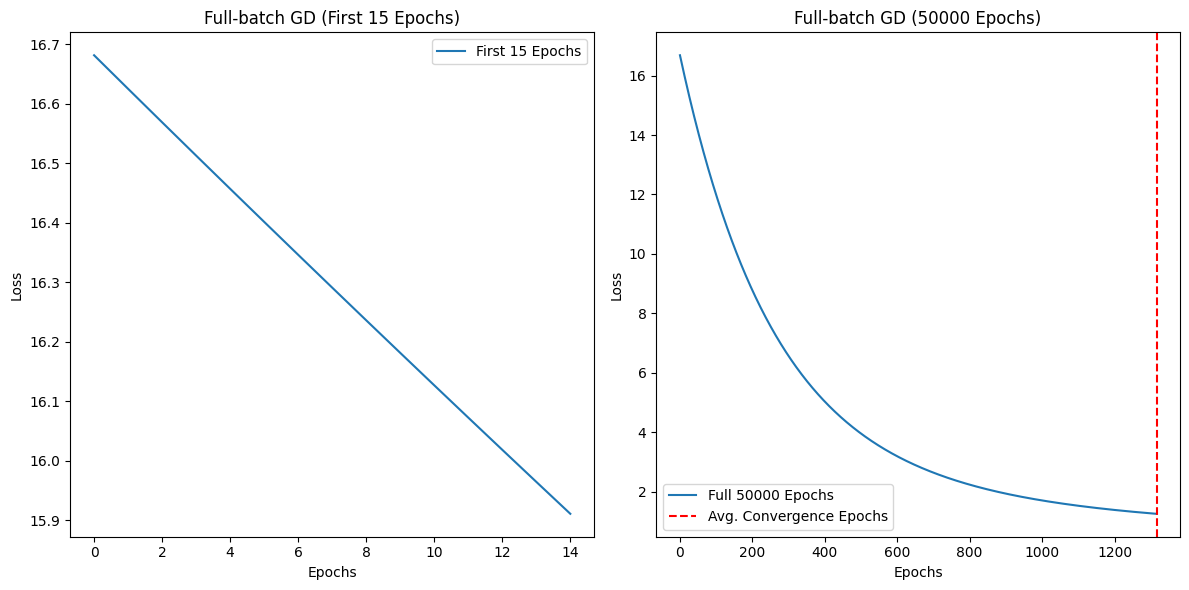

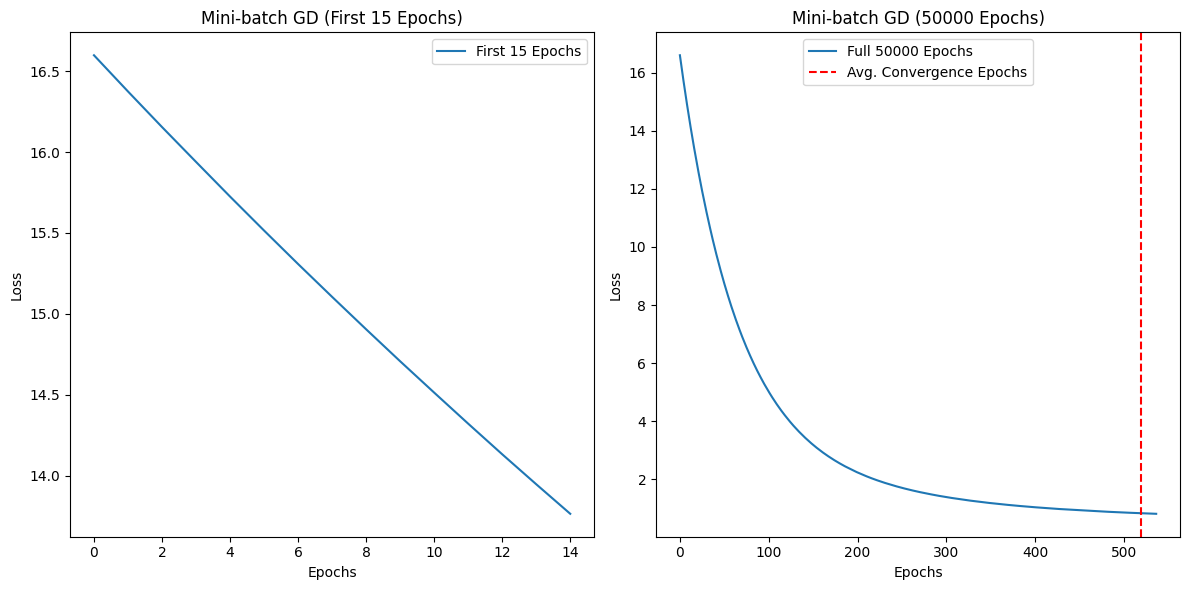

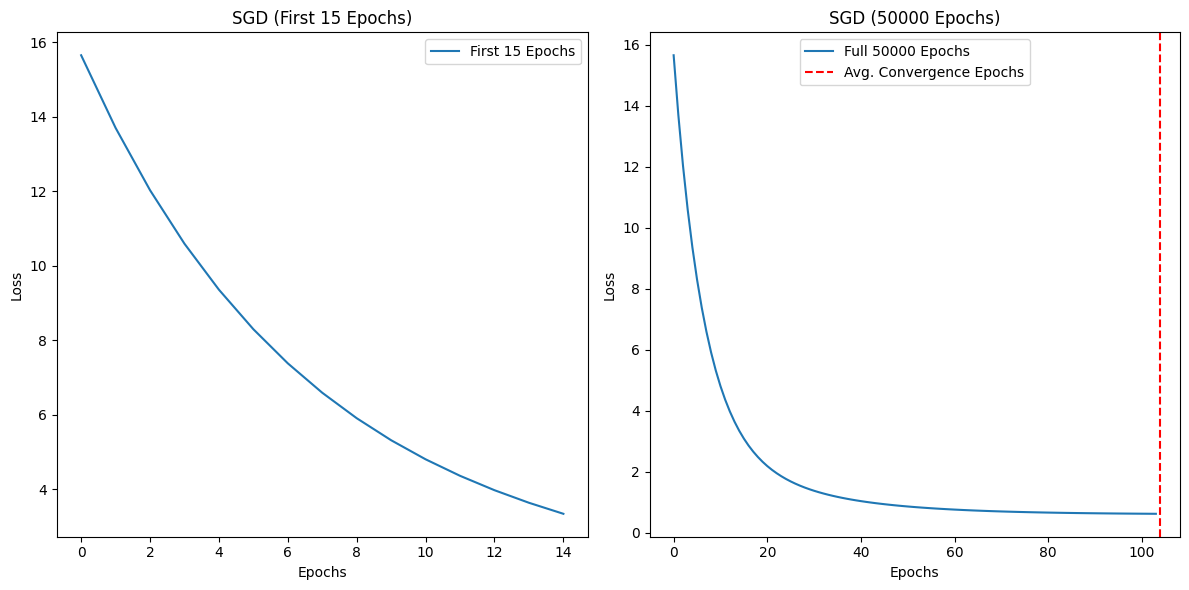

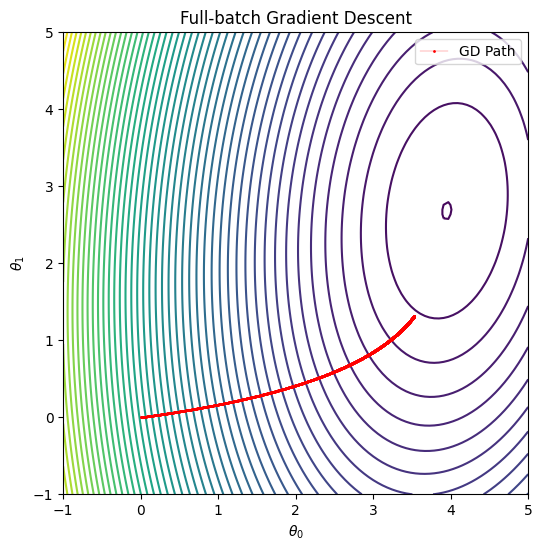

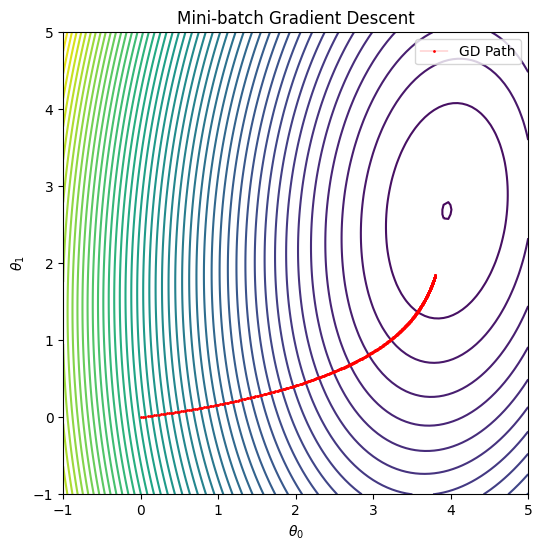

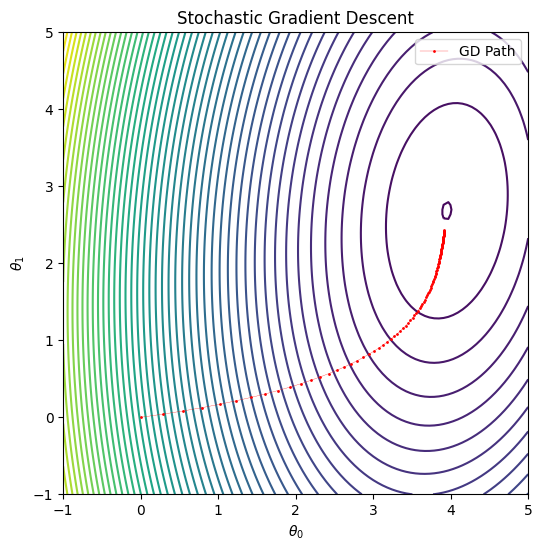

In [9]:
import matplotlib.pyplot as plt
import torch
import numpy as np

# Gradient Descent Update Step (with out-of-place operations)
def update_params(theta0, theta1, grads, lr):
    theta0.data = theta0 - lr * grads[0]
    theta1.data = theta1 - lr * grads[1]
    return theta0, theta1

# Plotting loss over epochs for each method
def plot_loss(losses, title, avg_epochs, max_epochs, filename):
    plt.figure(figsize=(12, 6))

    # Loss for the first 15 epochs
    plt.subplot(1, 2, 1)
    plt.plot(losses[:15], label='First 15 Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} (First 15 Epochs)')
    plt.legend()

    # Loss for the full 50000 epochs
    plt.subplot(1, 2, 2)
    plt.plot(losses, label='Full 50000 Epochs')
    plt.axvline(x=avg_epochs, color='r', linestyle='--', label='Avg. Convergence Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} (50000 Epochs)')
    plt.legend()

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

def full_batch_gd(x, y, theta0, theta1, lr=0.001, epochs=50000, epsilon=0.001, optimal_loss=None):
    losses = []
    iterations = 0
    theta0_path, theta1_path = [theta0.item()], [theta1.item()]
    prev_loss=None

    for epoch in range(epochs):
        preds = linear_model(x, theta0, theta1)
        loss = compute_loss(preds, y)
        losses.append(loss.item())

        if prev_loss is not None and abs(loss.item() - prev_loss) < epsilon:
            break

        loss.backward()
        theta0.retain_grad()
        theta1.retain_grad()
        grads = [theta0.grad, theta1.grad]
        theta0, theta1 = update_params(theta0, theta1, grads, lr)
        theta0.grad.zero_()
        theta1.grad.zero_()


        theta0_path.append(theta0.item())
        theta1_path.append(theta1.item())

        prev_loss = loss.item()
        iterations += 1

    return theta0, theta1, losses, iterations, epoch + 1 , theta0_path, theta1_path

# Mini-batch Gradient Descent
def mini_batch_gd(x, y, theta0, theta1, lr=0.001, epochs=50000, batch_size=10, epsilon=0.001):
    losses = []
    iterations = 0
    theta0_path, theta1_path = [theta0.item()], [theta1.item()]
    dataset = torch.utils.data.TensorDataset(x, y)
    loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
    prev_loss = None  # To track the loss of the previous epoch

    for epoch in range(epochs):
        epoch_loss = 0
        for batch_x, batch_y in loader:
            preds = linear_model(batch_x, theta0, theta1)
            loss = compute_loss(preds, batch_y)
            epoch_loss += loss.item()

            loss.backward()

            grads = [theta0.grad, theta1.grad]
            theta0, theta1 = update_params(theta0, theta1, grads, lr)
            theta0.grad.zero_()
            theta1.grad.zero_()

            iterations += 1

        avg_loss = epoch_loss / len(loader)
        losses.append(avg_loss)

        # Break if the difference between consecutive losses is less than epsilon
        if prev_loss is not None and abs(avg_loss - prev_loss) < epsilon:
            break

        theta0_path.append(theta0.item())
        theta1_path.append(theta1.item())

        prev_loss = avg_loss

    return theta0, theta1, losses, iterations, epoch + 1, theta0_path, theta1_path

# Stochastic Gradient Descent (SGD)
def sgd(x, y, theta0, theta1, lr=0.001, epochs=50000, epsilon=0.001):
    losses = []
    iterations = 0
    theta0_path, theta1_path = [theta0.item()], [theta1.item()]
    dataset = torch.utils.data.TensorDataset(x, y)
    loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)
    prev_loss = None

    for epoch in range(epochs):
        epoch_loss = 0
        for point_x, point_y in loader:
            preds = linear_model(point_x, theta0, theta1)
            loss = compute_loss(preds, point_y)
            epoch_loss += loss.item()

            loss.backward()

            grads = [theta0.grad, theta1.grad]
            theta0, theta1 = update_params(theta0, theta1, grads, lr)
            theta0.grad.zero_()
            theta1.grad.zero_()

            iterations += 1

        avg_loss = epoch_loss / len(loader)
        losses.append(avg_loss)

        # Break if the difference between consecutive losses is less than epsilon
        if prev_loss is not None and abs(avg_loss - prev_loss) < epsilon:
            break

        theta0_path.append(theta0.item())
        theta1_path.append(theta1.item())

        prev_loss = avg_loss

    return theta0, theta1, losses, iterations, epoch + 1, theta0_path, theta1_path


# Function to create contour plot
def plot_contour(x, y, theta0_path, theta1_path, title):
    # Define theta0 and theta1 grid
    theta0_vals = np.linspace(-1, 5, 100)
    theta1_vals = np.linspace(-1, 5, 100)
    theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)

    # Compute loss for each combination of theta0 and theta1
    loss_grid = np.zeros_like(theta0_grid)
    for i in range(theta0_grid.shape[0]):
        for j in range(theta0_grid.shape[1]):
            preds = theta1_grid[i, j] * x + theta0_grid[i, j]
            loss_grid[i, j] = np.mean((y - preds) ** 2)

    # Plot contour
    plt.figure(figsize=(6, 6))
    plt.contour(theta0_grid, theta1_grid, loss_grid, levels=50, cmap='viridis')
    plt.plot(theta0_path, theta1_path, marker='o', markersize=1,linewidth=0.2, color='red', label='GD Path')
    plt.title(title)
    plt.xlabel(r'$\theta_0$')
    plt.ylabel(r'$\theta_1$')
    plt.legend()
    plt.show()

# Initialization and parameters
theta0_init = torch.tensor([0], dtype=torch.float32, requires_grad=True)
theta1_init = torch.tensor([0], dtype=torch.float32, requires_grad=True)


num_runs = 10
full_batch_iterations = []
mini_batch_iterations = []
sgd_iterations_list = []
full_batch_epochs = []
mini_batch_epochs = []
sgd_epochs_list = []

for _ in range(num_runs):
    theta0_full, theta1_full, full_losses, full_iterations, full_epochs,full_theta0_path, full_theta1_path = full_batch_gd(
        x1_tensor, y_tensor, theta0_init.clone().detach().requires_grad_(True),
        theta1_init.clone().detach().requires_grad_(True)
    )
    theta0_mini, theta1_mini, mini_losses, mini_iterations, mini_epochs , mini_theta0_path, mini_theta1_path= mini_batch_gd(
        x1_tensor, y_tensor, theta0_init.clone().detach().requires_grad_(True),
        theta1_init.clone().detach().requires_grad_(True)
    )
    theta0_sgd, theta1_sgd, sgd_losses, sgd_iterations, sgd_epochs , sgd_theta0_path, sgd_theta1_path = sgd(
        x1_tensor, y_tensor, theta0_init.clone().detach().requires_grad_(True),
        theta1_init.clone().detach().requires_grad_(True)
    )

    full_batch_iterations.append(full_iterations)
    mini_batch_iterations.append(mini_iterations)
    sgd_iterations_list.append(sgd_iterations)

    full_batch_epochs.append(full_epochs)
    mini_batch_epochs.append(mini_epochs)
    sgd_epochs_list.append(sgd_epochs)

# Calculate average number of iterations and epochs
avg_full_batch_iterations = np.mean(full_batch_iterations)
avg_mini_batch_iterations = np.mean(mini_batch_iterations)
avg_sgd_iterations = np.mean(sgd_iterations_list)

avg_full_batch_epochs = np.mean(full_batch_epochs)
avg_mini_batch_epochs = np.mean(mini_batch_epochs)
avg_sgd_epochs = np.mean(sgd_epochs_list)

# Print the average number of iterations and epochs for each method
print(f"Average Full-batch GD converged in {avg_full_batch_iterations:.2f} iterations and {avg_full_batch_epochs:.2f} epochs")
print(f"Average Mini-batch GD converged in {avg_mini_batch_iterations:.2f} iterations and {avg_mini_batch_epochs:.2f} epochs")
print(f"Average SGD converged in {avg_sgd_iterations:.2f} iterations and {avg_sgd_epochs:.2f} epochs")

# Plotting the losses for comparison (visualizing for 15 and 50000 epochs)
plot_loss(full_losses, "Full-batch GD", avg_full_batch_epochs, 50000, 'full_batch_gd.png')
plot_loss(mini_losses, "Mini-batch GD", avg_mini_batch_epochs, 50000, 'mini_batch_gd.png')
plot_loss(sgd_losses, "SGD", avg_sgd_epochs, 50000, 'sgd.png')

# Plot the contour plots for each method
plot_contour(x1, y, full_theta0_path, full_theta1_path, "Full-batch Gradient Descent")
plot_contour(x1, y, mini_theta0_path, mini_theta1_path, "Mini-batch Gradient Descent")
plot_contour(x1, y, sgd_theta0_path, sgd_theta1_path, "Stochastic Gradient Descent")

Average Full-batch GD converged in 296.00 iterations and 297.00 epochs
Average Mini-batch GD converged in 352.00 iterations and 88.00 epochs
Average SGD converged in 640.00 iterations and 16.00 epochs


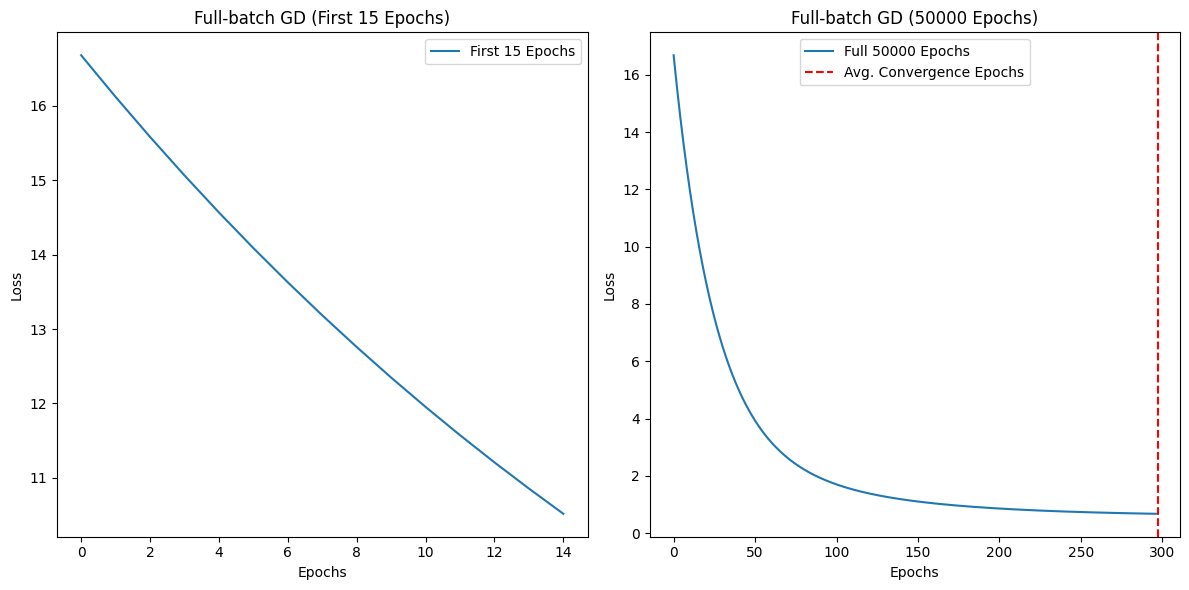

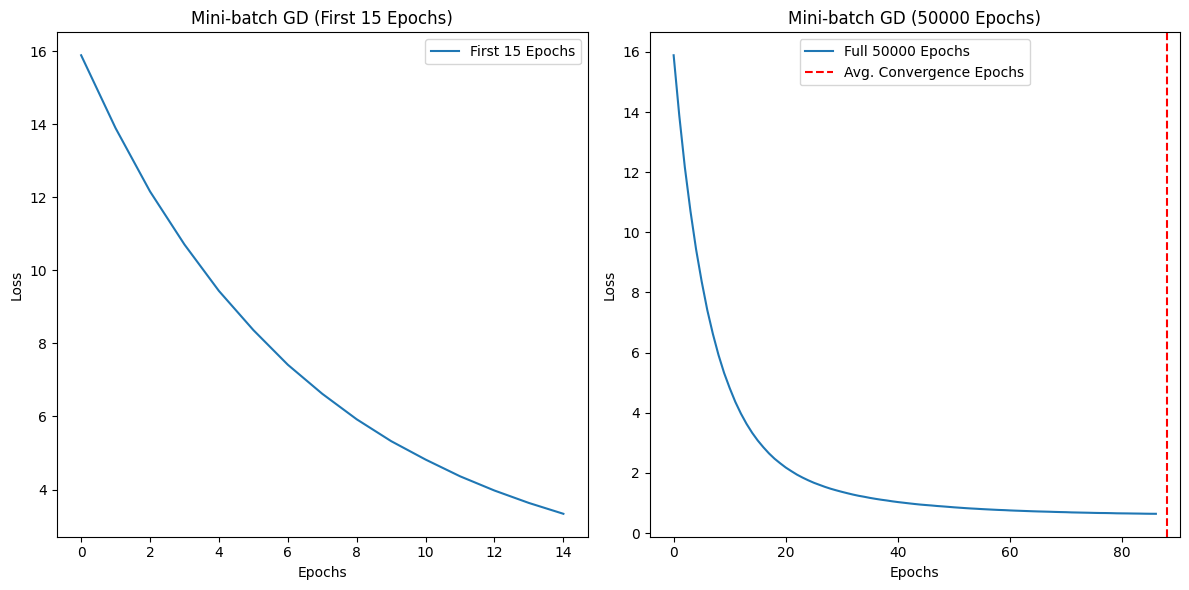

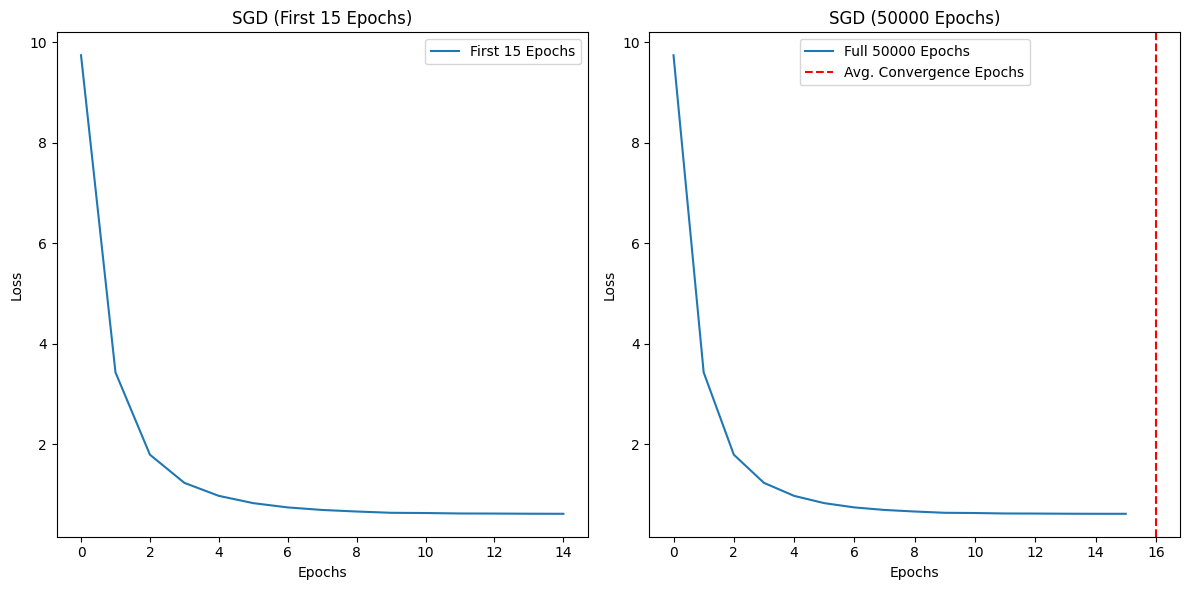

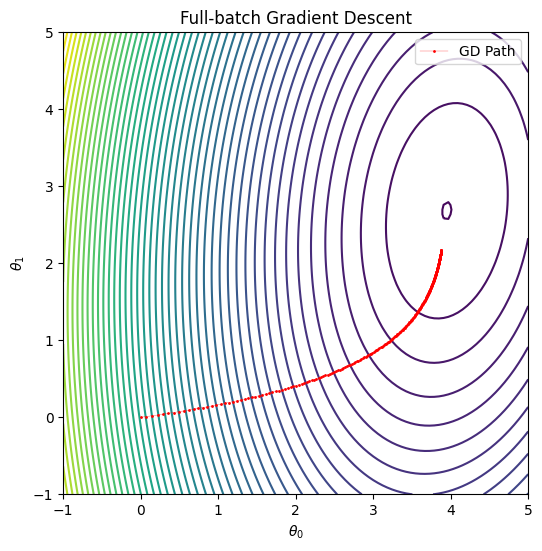

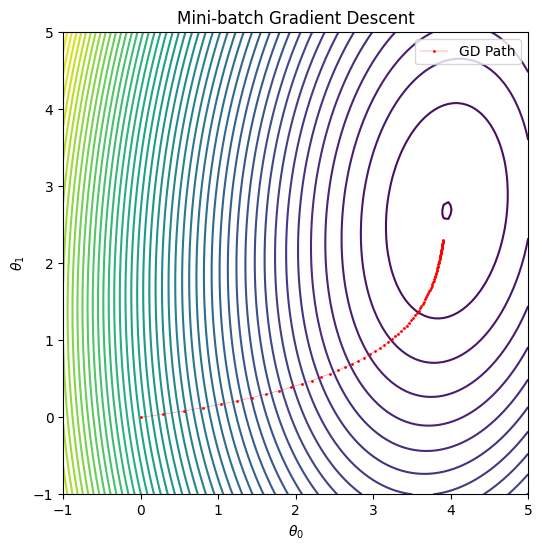

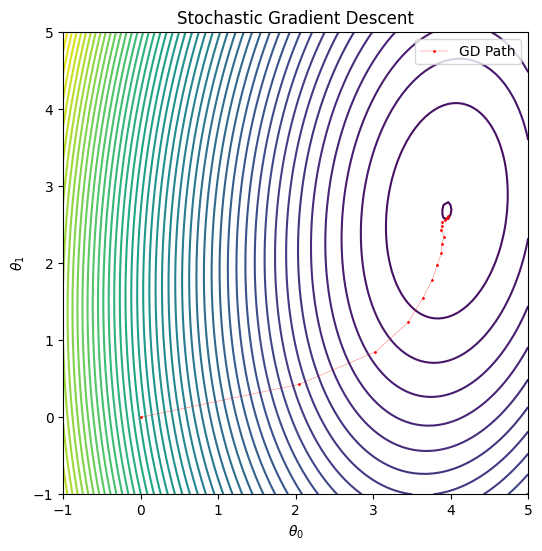

In [11]:
import matplotlib.pyplot as plt
import torch
import numpy as np

# Gradient Descent Update Step (with out-of-place operations)
def update_params(theta0, theta1, grads, lr):
    theta0.data = theta0 - lr * grads[0]
    theta1.data = theta1 - lr * grads[1]
    return theta0, theta1

# Plotting loss over epochs for each method
def plot_loss(losses, title, avg_epochs, max_epochs, filename):
    plt.figure(figsize=(12, 6))

    # Loss for the first 15 epochs
    plt.subplot(1, 2, 1)
    plt.plot(losses[:15], label='First 15 Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} (First 15 Epochs)')
    plt.legend()

    # Loss for the full 50000 epochs
    plt.subplot(1, 2, 2)
    plt.plot(losses, label='Full 50000 Epochs')
    plt.axvline(x=avg_epochs, color='r', linestyle='--', label='Avg. Convergence Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} (50000 Epochs)')
    plt.legend()

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

def full_batch_gd(x, y, theta0, theta1, lr=0.01, epochs=50000, epsilon=0.001, optimal_loss=None):
    losses = []
    iterations = 0
    theta0_path, theta1_path = [theta0.item()], [theta1.item()]
    prev_loss=None

    for epoch in range(epochs):
        preds = linear_model(x, theta0, theta1)
        loss = compute_loss(preds, y)
        losses.append(loss.item())

        if prev_loss is not None and abs(loss.item() - prev_loss) < epsilon:
            break

        loss.backward()
        theta0.retain_grad()
        theta1.retain_grad()
        grads = [theta0.grad, theta1.grad]
        theta0, theta1 = update_params(theta0, theta1, grads, lr)
        theta0.grad.zero_()
        theta1.grad.zero_()


        theta0_path.append(theta0.item())
        theta1_path.append(theta1.item())

        prev_loss = loss.item()
        iterations += 1

    return theta0, theta1, losses, iterations, epoch + 1 , theta0_path, theta1_path

# Mini-batch Gradient Descent
def mini_batch_gd(x, y, theta0, theta1, lr=0.01, epochs=50000, batch_size=10, epsilon=0.001):
    losses = []
    iterations = 0
    theta0_path, theta1_path = [theta0.item()], [theta1.item()]
    dataset = torch.utils.data.TensorDataset(x, y)
    loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
    prev_loss = None  # To track the loss of the previous epoch

    for epoch in range(epochs):
        epoch_loss = 0
        for batch_x, batch_y in loader:
            preds = linear_model(batch_x, theta0, theta1)
            loss = compute_loss(preds, batch_y)
            epoch_loss += loss.item()

            loss.backward()

            grads = [theta0.grad, theta1.grad]
            theta0, theta1 = update_params(theta0, theta1, grads, lr)
            theta0.grad.zero_()
            theta1.grad.zero_()

            iterations += 1

        avg_loss = epoch_loss / len(loader)
        losses.append(avg_loss)

        # Break if the difference between consecutive losses is less than epsilon
        if prev_loss is not None and abs(avg_loss - prev_loss) < epsilon:
            break

        theta0_path.append(theta0.item())
        theta1_path.append(theta1.item())

        prev_loss = avg_loss

    return theta0, theta1, losses, iterations, epoch + 1, theta0_path, theta1_path

# Stochastic Gradient Descent (SGD)
def sgd(x, y, theta0, theta1, lr=0.01, epochs=50000, epsilon=0.001):
    losses = []
    iterations = 0
    theta0_path, theta1_path = [theta0.item()], [theta1.item()]
    dataset = torch.utils.data.TensorDataset(x, y)
    loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)
    prev_loss = None

    for epoch in range(epochs):
        epoch_loss = 0
        for point_x, point_y in loader:
            preds = linear_model(point_x, theta0, theta1)
            loss = compute_loss(preds, point_y)
            epoch_loss += loss.item()

            loss.backward()

            grads = [theta0.grad, theta1.grad]
            theta0, theta1 = update_params(theta0, theta1, grads, lr)
            theta0.grad.zero_()
            theta1.grad.zero_()

            iterations += 1

        avg_loss = epoch_loss / len(loader)
        losses.append(avg_loss)

        # Break if the difference between consecutive losses is less than epsilon
        if prev_loss is not None and abs(avg_loss - prev_loss) < epsilon:
            break

        theta0_path.append(theta0.item())
        theta1_path.append(theta1.item())

        prev_loss = avg_loss

    return theta0, theta1, losses, iterations, epoch + 1, theta0_path, theta1_path


# Function to create contour plot
def plot_contour(x, y, theta0_path, theta1_path, title):
    # Define theta0 and theta1 grid
    theta0_vals = np.linspace(-1, 5, 100)
    theta1_vals = np.linspace(-1, 5, 100)
    theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)

    # Compute loss for each combination of theta0 and theta1
    loss_grid = np.zeros_like(theta0_grid)
    for i in range(theta0_grid.shape[0]):
        for j in range(theta0_grid.shape[1]):
            preds = theta1_grid[i, j] * x + theta0_grid[i, j]
            loss_grid[i, j] = np.mean((y - preds) ** 2)

    # Plot contour
    plt.figure(figsize=(6, 6))
    plt.contour(theta0_grid, theta1_grid, loss_grid, levels=50, cmap='viridis')
    plt.plot(theta0_path, theta1_path, marker='o', markersize=1,linewidth=0.2, color='red', label='GD Path')
    plt.title(title)
    plt.xlabel(r'$\theta_0$')
    plt.ylabel(r'$\theta_1$')
    plt.legend()
    plt.show()

# Initialization and parameters
theta0_init = torch.tensor([0], dtype=torch.float32, requires_grad=True)
theta1_init = torch.tensor([0], dtype=torch.float32, requires_grad=True)


num_runs = 10
full_batch_iterations = []
mini_batch_iterations = []
sgd_iterations_list = []
full_batch_epochs = []
mini_batch_epochs = []
sgd_epochs_list = []

for _ in range(num_runs):
    theta0_full, theta1_full, full_losses, full_iterations, full_epochs,full_theta0_path, full_theta1_path = full_batch_gd(
        x1_tensor, y_tensor, theta0_init.clone().detach().requires_grad_(True),
        theta1_init.clone().detach().requires_grad_(True)
    )
    theta0_mini, theta1_mini, mini_losses, mini_iterations, mini_epochs , mini_theta0_path, mini_theta1_path= mini_batch_gd(
        x1_tensor, y_tensor, theta0_init.clone().detach().requires_grad_(True),
        theta1_init.clone().detach().requires_grad_(True)
    )
    theta0_sgd, theta1_sgd, sgd_losses, sgd_iterations, sgd_epochs , sgd_theta0_path, sgd_theta1_path = sgd(
        x1_tensor, y_tensor, theta0_init.clone().detach().requires_grad_(True),
        theta1_init.clone().detach().requires_grad_(True)
    )

    full_batch_iterations.append(full_iterations)
    mini_batch_iterations.append(mini_iterations)
    sgd_iterations_list.append(sgd_iterations)

    full_batch_epochs.append(full_epochs)
    mini_batch_epochs.append(mini_epochs)
    sgd_epochs_list.append(sgd_epochs)

# Calculate average number of iterations and epochs
avg_full_batch_iterations = np.mean(full_batch_iterations)
avg_mini_batch_iterations = np.mean(mini_batch_iterations)
avg_sgd_iterations = np.mean(sgd_iterations_list)

avg_full_batch_epochs = np.mean(full_batch_epochs)
avg_mini_batch_epochs = np.mean(mini_batch_epochs)
avg_sgd_epochs = np.mean(sgd_epochs_list)

# Print the average number of iterations and epochs for each method
print(f"Average Full-batch GD converged in {avg_full_batch_iterations:.2f} iterations and {avg_full_batch_epochs:.2f} epochs")
print(f"Average Mini-batch GD converged in {avg_mini_batch_iterations:.2f} iterations and {avg_mini_batch_epochs:.2f} epochs")
print(f"Average SGD converged in {avg_sgd_iterations:.2f} iterations and {avg_sgd_epochs:.2f} epochs")

# Plotting the losses for comparison (visualizing for 15 and 50000 epochs)
plot_loss(full_losses, "Full-batch GD", avg_full_batch_epochs, 50000, 'full_batch_gd.png')
plot_loss(mini_losses, "Mini-batch GD", avg_mini_batch_epochs, 50000, 'mini_batch_gd.png')
plot_loss(sgd_losses, "SGD", avg_sgd_epochs, 50000, 'sgd.png')

# Plot the contour plots for each method
plot_contour(x1, y, full_theta0_path, full_theta1_path, "Full-batch Gradient Descent")
plot_contour(x1, y, mini_theta0_path, mini_theta1_path, "Mini-batch Gradient Descent")
plot_contour(x1, y, sgd_theta0_path, sgd_theta1_path, "Stochastic Gradient Descent")

## Q3 explanation

1. With LR=0.01

  a) FBD : 297

  b) MBD : 88

  c) SGD : 16

2. With LR=0.001

  a) FBD : 1316

  b) MBD : 518

  c) SGD : 103

We see that when we use LR = 0.001, it takes more number of epochs to converge because it takes small steps, also we see from the contour plots that they do not reach the optimal solution as near as the LR of 0.01. This happens due the small learning rate. Stochastic gradient is the least affected by this problem as it has 40 iterations in its 1 epoch which increses the step size per epoch.


## Question 4

With Momentum : Average Full-batch GD converged in 202.00 iterations and 203.00 epochs
With Momentum : Average Mini-batch GD converged in 234.00 iterations and 58.50 epochs
With Momentum : Average SGD converged in 640.00 iterations and 16.00 epochs


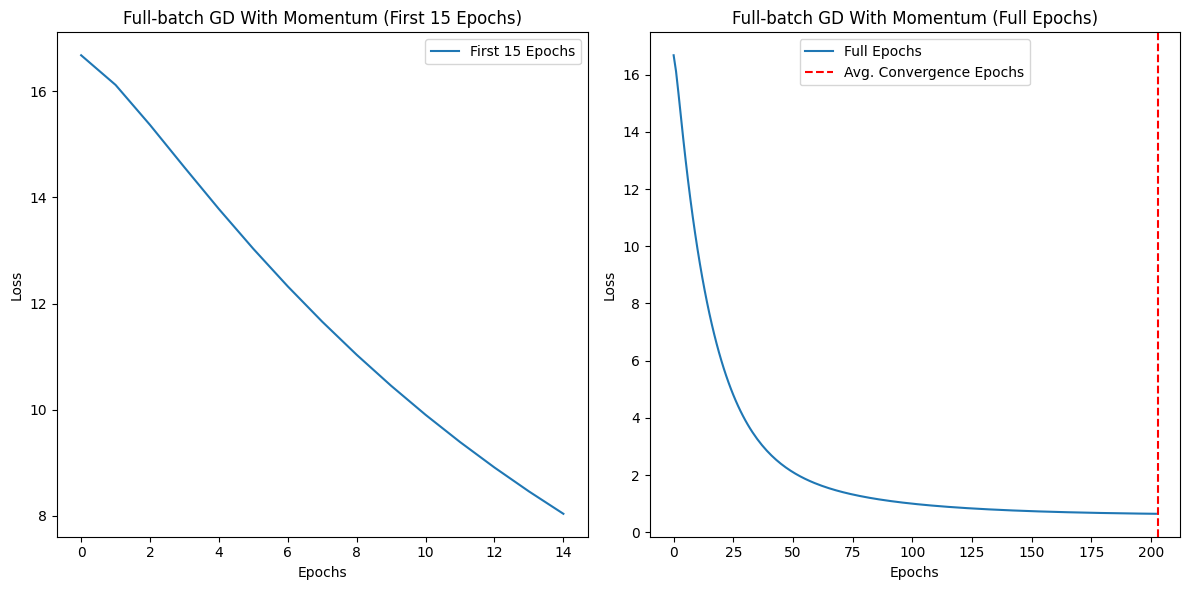

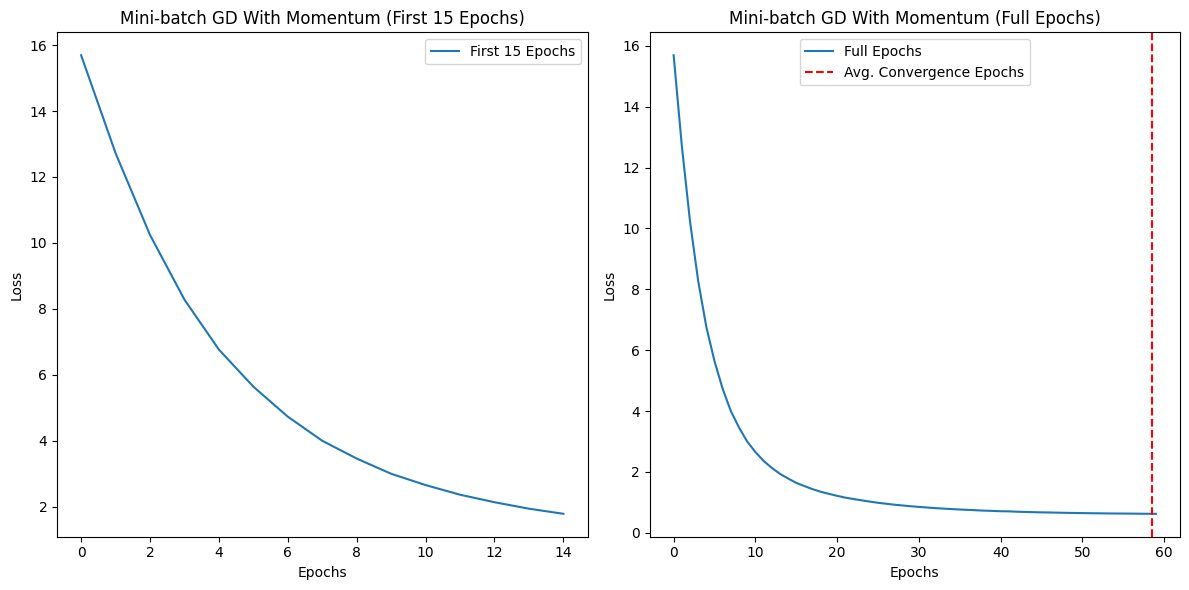

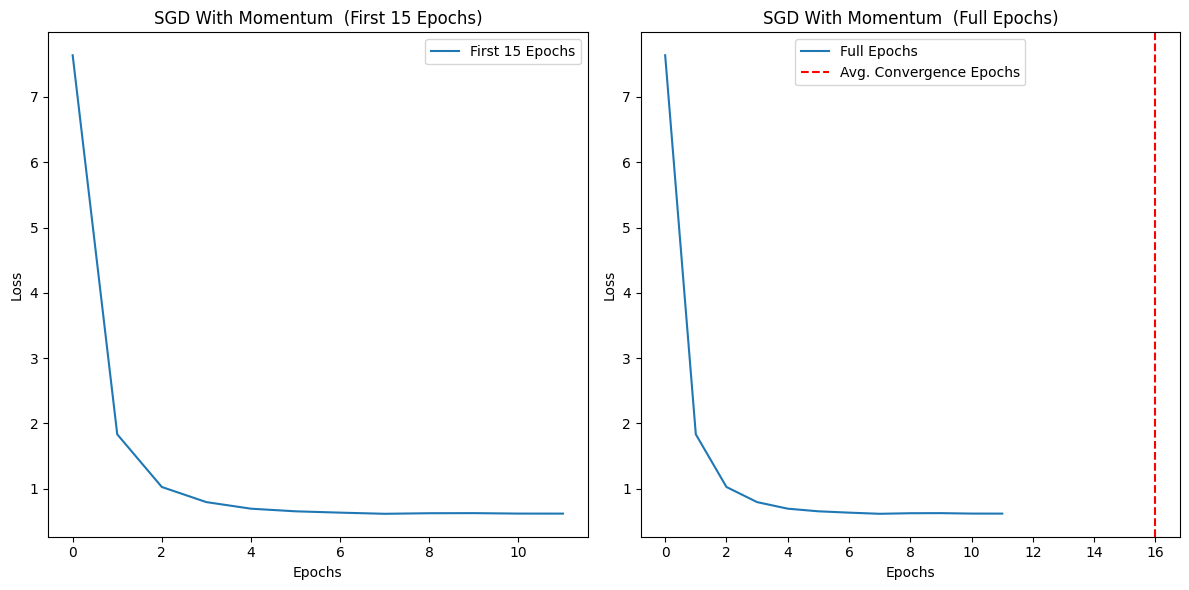

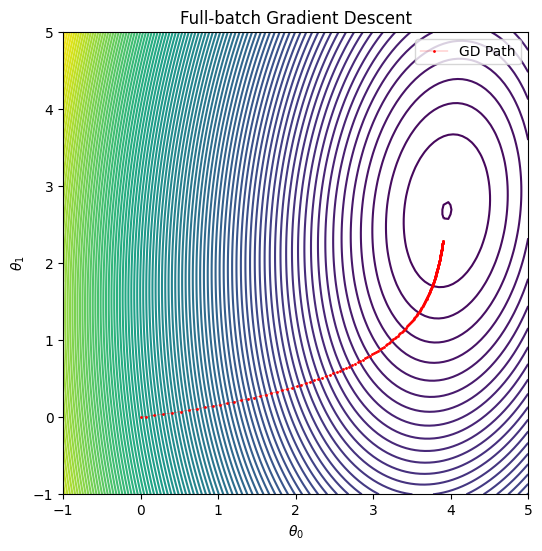

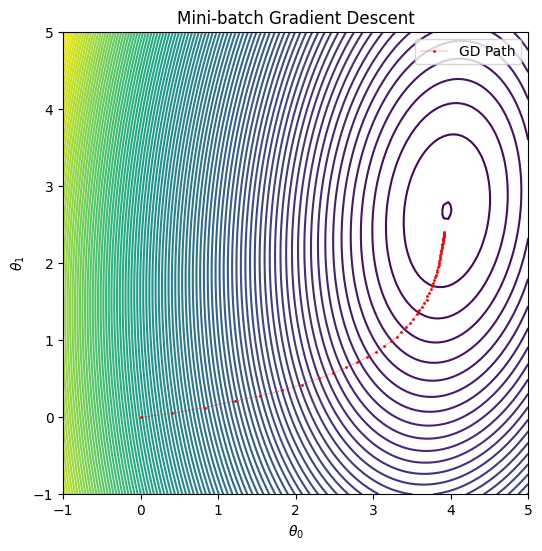

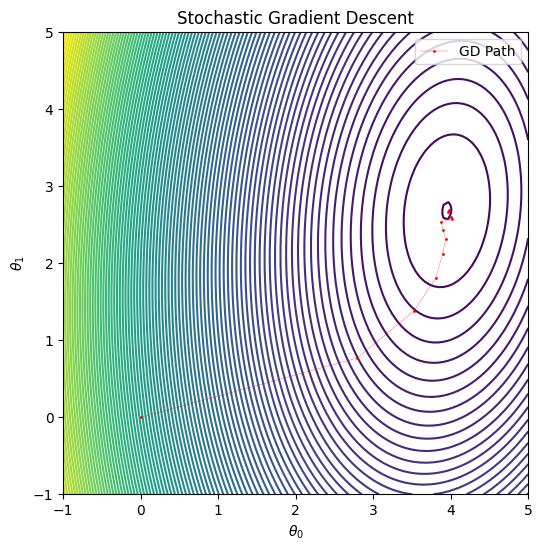

In [13]:
# Gradient Descent Update Step (with momentum)
def update_params_momentum(theta0, theta1, grads, lr, momentum, prev_change_x):
    change_x = lr * grads[0] + momentum * prev_change_x[0]
    theta0.data -= change_x  # out-of-place operation

    change_y = lr * grads[1] + momentum * prev_change_x[1]
    theta1.data -= change_y  # out-of-place operation

    return theta0, theta1, (change_x, change_y)

# Plotting loss over epochs for each method
def plot_loss(losses, title, avg_epochs, max_epochs, filename):
    plt.figure(figsize=(12, 6))

    # Loss for the first 15 epochs
    plt.subplot(1, 2, 1)
    plt.plot(losses[:15], label='First 15 Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} (First 15 Epochs)')
    plt.legend()

    # Loss for the full 50000 epochs
    plt.subplot(1, 2, 2)
    plt.plot(losses, label='Full Epochs')
    plt.axvline(x=avg_epochs, color='r', linestyle='--', label='Avg. Convergence Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} (Full Epochs)')
    plt.legend()

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()



# Full-batch Gradient Descent with Momentum
def full_batch_gd_momentum(x, y, theta0, theta1, lr=0.01, epochs=5000, epsilon=0.001, momentum=0.4):
    losses = []
    iterations = 0
    theta0_path, theta1_path = [theta0.item()], [theta1.item()]
    prev_change_x = (0.0, 0.0)
    prev_loss = None  # Initialize previous loss

    for epoch in range(epochs):
        preds = linear_model(x, theta0, theta1)
        loss = compute_loss(preds, y)
        losses.append(loss.item())

        if prev_loss is not None and abs(loss.item() - prev_loss) < epsilon:
            break  # Stop if the change in loss is smaller than epsilon

        loss.backward()
        grads = [theta0.grad, theta1.grad]
        theta0, theta1, prev_change_x = update_params_momentum(theta0, theta1, grads, lr, momentum, prev_change_x)
        theta0.grad.zero_()
        theta1.grad.zero_()

        theta0_path.append(theta0.item())
        theta1_path.append(theta1.item())

        prev_loss = loss.item()  # Update previous loss
        iterations += 1

    return theta0, theta1, losses, iterations, epoch + 1, theta0_path, theta1_path


# Mini-batch Gradient Descent with Momentum
def mini_batch_gd_momentum(x, y, theta0, theta1, lr=0.01, epochs=5000, batch_size=10, epsilon=0.001, momentum=0.4):
    losses = []
    iterations = 0
    theta0_path, theta1_path = [theta0.item()], [theta1.item()]
    prev_change_x = (0.0, 0.0)
    dataset = torch.utils.data.TensorDataset(x, y)
    loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
    prev_loss = None  # Initialize previous loss

    for epoch in range(epochs):
        epoch_loss = 0
        for batch_x, batch_y in loader:
            preds = linear_model(batch_x, theta0, theta1)
            loss = compute_loss(preds, batch_y)
            epoch_loss += loss.item()

            loss.backward()
            grads = [theta0.grad, theta1.grad]
            theta0, theta1, prev_change_x = update_params_momentum(theta0, theta1, grads, lr, momentum, prev_change_x)
            theta0.grad.zero_()
            theta1.grad.zero_()
            iterations += 1

        avg_loss = epoch_loss / len(loader)
        losses.append(avg_loss)

        if prev_loss is not None and abs(avg_loss - prev_loss) < epsilon:
            break  # Stop if the change in loss is smaller than epsilon

        theta0_path.append(theta0.item())
        theta1_path.append(theta1.item())

        prev_loss = avg_loss  # Update previous loss

    return theta0, theta1, losses, iterations, epoch + 1, theta0_path, theta1_path


# Stochastic Gradient Descent with Momentum
def sgd_momentum(x, y, theta0, theta1, lr=0.01, epochs=5000, epsilon=0.001, momentum=0.4):
    losses = []
    iterations = 0
    theta0_path, theta1_path = [theta0.item()], [theta1.item()]
    prev_change_x = (0.0, 0.0)
    dataset = torch.utils.data.TensorDataset(x, y)
    loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)
    prev_loss = None  # Initialize previous loss

    for epoch in range(epochs):
        epoch_loss = 0
        for point_x, point_y in loader:
            preds = linear_model(point_x, theta0, theta1)
            loss = compute_loss(preds, point_y)
            epoch_loss += loss.item()

            loss.backward()
            grads = [theta0.grad, theta1.grad]
            theta0, theta1, prev_change_x = update_params_momentum(theta0, theta1, grads, lr, momentum, prev_change_x)
            theta0.grad.zero_()
            theta1.grad.zero_()
            iterations += 1

        avg_loss = epoch_loss / len(loader)
        losses.append(avg_loss)

        if prev_loss is not None and abs(avg_loss - prev_loss) < epsilon:
            break  # Stop if the change in loss is smaller than epsilon

        theta0_path.append(theta0.item())
        theta1_path.append(theta1.item())

        prev_loss = avg_loss  # Update previous loss

    return theta0, theta1, losses, iterations, epoch + 1, theta0_path, theta1_path


# Function to create contour plot
def plot_contour(x, y, theta0_path, theta1_path, title):
    # Define theta0 and theta1 grid
    theta0_vals = np.linspace(-1, 5, 100)
    theta1_vals = np.linspace(-1, 5, 100)
    theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)

    # Compute loss for each combination of theta0 and theta1
    loss_grid = np.zeros_like(theta0_grid)
    for i in range(theta0_grid.shape[0]):
        for j in range(theta0_grid.shape[1]):
            preds = theta1_grid[i, j] * x + theta0_grid[i, j]
            loss_grid[i, j] = np.mean((y - preds) ** 2)

    # Plot contour
    plt.figure(figsize=(6, 6))
    plt.contour(theta0_grid, theta1_grid, loss_grid, levels=100, cmap='viridis')
    plt.plot(theta0_path, theta1_path, marker='o', markersize=1, linewidth=0.2, color='red', label='GD Path')
    plt.title(title)
    plt.xlabel(r'$\theta_0$')
    plt.ylabel(r'$\theta_1$')
    plt.legend()
    plt.show()

# Initialization and parameters
theta0_init = torch.tensor([0], dtype=torch.float32, requires_grad=True)
theta1_init = torch.tensor([0], dtype=torch.float32, requires_grad=True)




# Run each method multiple times to calculate average iterations and epochs to convergence
num_runs = 10
full_batch_iterations = []
mini_batch_iterations = []
sgd_iterations_list = []
full_batch_epochs = []
mini_batch_epochs = []
sgd_epochs_list = []


for _ in range(num_runs):
    theta0_full, theta1_full, full_losses, full_iterations, full_epochs,full_theta0_path, full_theta1_path = full_batch_gd_momentum(
        x1_tensor, y_tensor, theta0_init.clone().detach().requires_grad_(True),
        theta1_init.clone().detach().requires_grad_(True)
    )
    theta0_mini, theta1_mini, mini_losses, mini_iterations, mini_epochs , mini_theta0_path, mini_theta1_path= mini_batch_gd_momentum(
        x1_tensor, y_tensor, theta0_init.clone().detach().requires_grad_(True),
        theta1_init.clone().detach().requires_grad_(True)
    )
    theta0_sgd, theta1_sgd, sgd_losses, sgd_iterations, sgd_epochs , sgd_theta0_path, sgd_theta1_path = sgd_momentum(
        x1_tensor, y_tensor, theta0_init.clone().detach().requires_grad_(True),
        theta1_init.clone().detach().requires_grad_(True)
    )

    full_batch_iterations.append(full_iterations)
    mini_batch_iterations.append(mini_iterations)
    sgd_iterations_list.append(sgd_iterations)

    full_batch_epochs.append(full_epochs)
    mini_batch_epochs.append(mini_epochs)
    sgd_epochs_list.append(sgd_epochs)

# Calculate average number of iterations and epochs
avg_full_batch_iterations = np.mean(full_batch_iterations)
avg_mini_batch_iterations = np.mean(mini_batch_iterations)
avg_sgd_iterations = np.mean(sgd_iterations_list)

avg_full_batch_epochs = np.mean(full_batch_epochs)
avg_mini_batch_epochs = np.mean(mini_batch_epochs)
avg_sgd_epochs = np.mean(sgd_epochs_list)

# Print the average number of iterations and epochs for each method
print(f"With Momentum : Average Full-batch GD converged in {avg_full_batch_iterations:.2f} iterations and {avg_full_batch_epochs:.2f} epochs")
print(f"With Momentum : Average Mini-batch GD converged in {avg_mini_batch_iterations:.2f} iterations and {avg_mini_batch_epochs:.2f} epochs")
print(f"With Momentum : Average SGD converged in {avg_sgd_iterations:.2f} iterations and {avg_sgd_epochs:.2f} epochs")

# Plotting the losses for comparison (visualizing for 15 and 50000 epochs)
plot_loss(full_losses, "Full-batch GD With Momentum", avg_full_batch_epochs, 5000, 'full_batch_gd_m.png')
plot_loss(mini_losses, "Mini-batch GD With Momentum", avg_mini_batch_epochs, 5000, 'mini_batch_gd_m.png')
plot_loss(sgd_losses, "SGD With Momentum ", avg_sgd_epochs, 5000, 'sgd_m.png')

# Plot the contour plots for each method
plot_contour(x1, y, full_theta0_path, full_theta1_path, "Full-batch Gradient Descent")
plot_contour(x1, y, mini_theta0_path, mini_theta1_path, "Mini-batch Gradient Descent")
plot_contour(x1, y, sgd_theta0_path, sgd_theta1_path, "Stochastic Gradient Descent")

With Momentum : Average Full-batch GD converged in 962.00 iterations and 963.00 epochs
With Momentum : Average Mini-batch GD converged in 1456.80 iterations and 364.20 epochs
With Momentum : Average SGD converged in 2660.00 iterations and 66.50 epochs


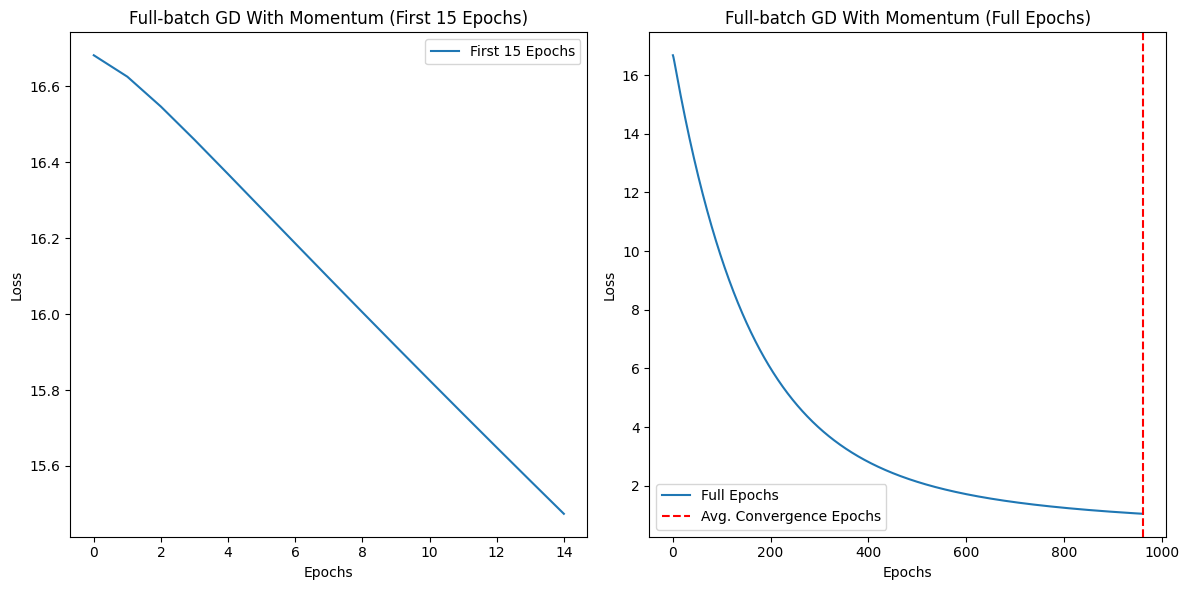

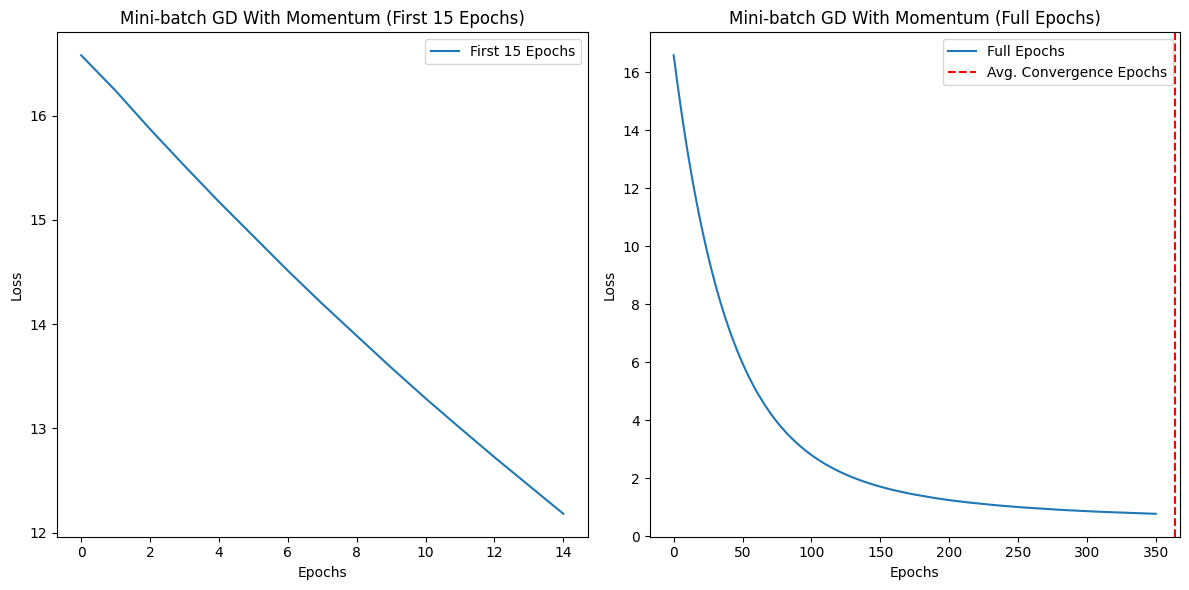

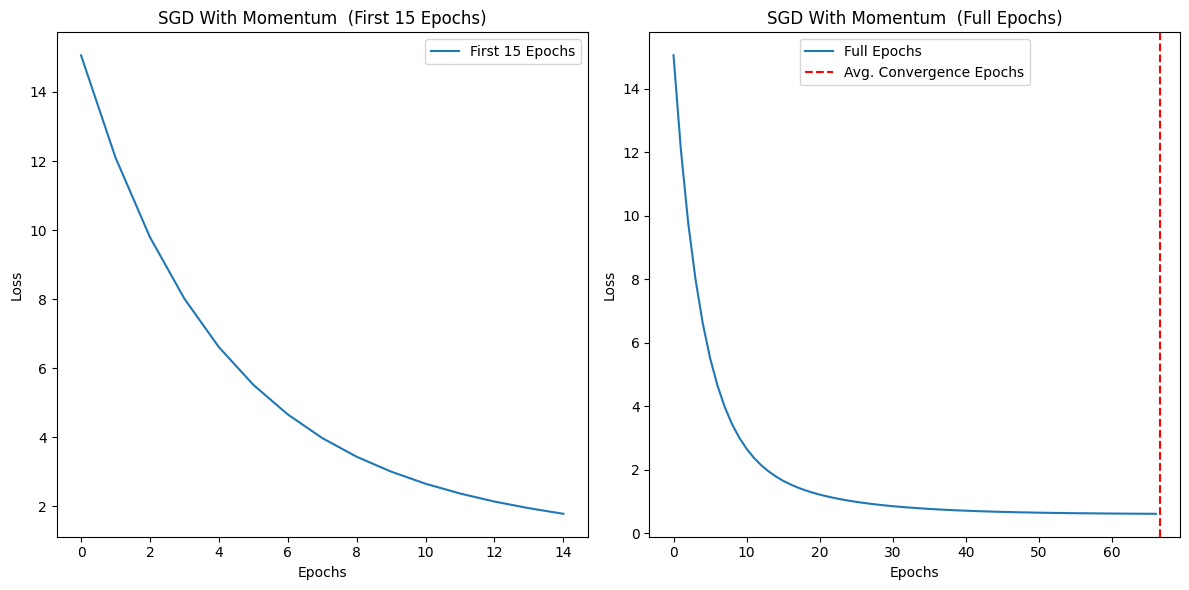

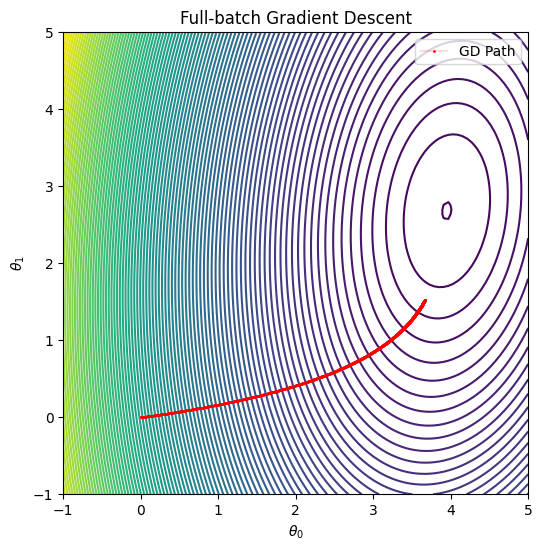

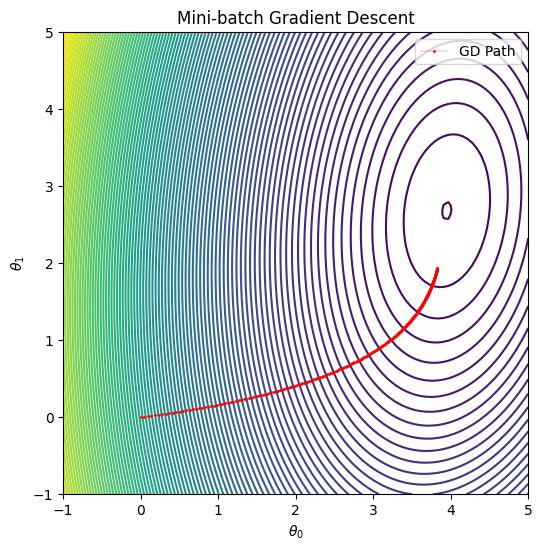

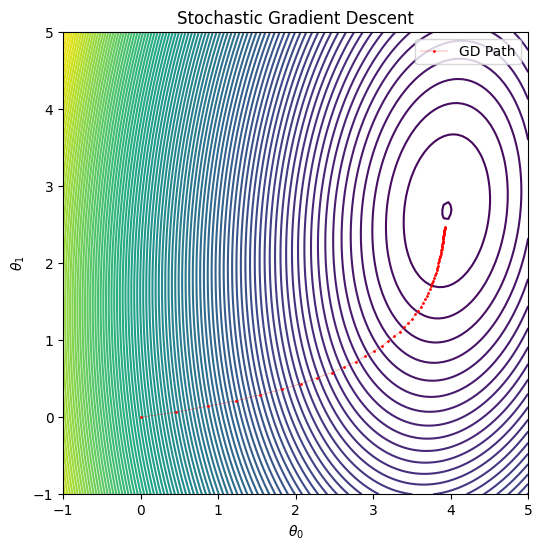

In [14]:
# Gradient Descent Update Step (with momentum)
def update_params_momentum(theta0, theta1, grads, lr, momentum, prev_change_x):
    change_x = lr * grads[0] + momentum * prev_change_x[0]
    theta0.data -= change_x  # out-of-place operation

    change_y = lr * grads[1] + momentum * prev_change_x[1]
    theta1.data -= change_y  # out-of-place operation

    return theta0, theta1, (change_x, change_y)

# Plotting loss over epochs for each method
def plot_loss(losses, title, avg_epochs, max_epochs, filename):
    plt.figure(figsize=(12, 6))

    # Loss for the first 15 epochs
    plt.subplot(1, 2, 1)
    plt.plot(losses[:15], label='First 15 Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} (First 15 Epochs)')
    plt.legend()

    # Loss for the full 50000 epochs
    plt.subplot(1, 2, 2)
    plt.plot(losses, label='Full Epochs')
    plt.axvline(x=avg_epochs, color='r', linestyle='--', label='Avg. Convergence Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} (Full Epochs)')
    plt.legend()

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()



# Full-batch Gradient Descent with Momentum
def full_batch_gd_momentum(x, y, theta0, theta1, lr=0.001, epochs=5000, epsilon=0.001, momentum=0.4):
    losses = []
    iterations = 0
    theta0_path, theta1_path = [theta0.item()], [theta1.item()]
    prev_change_x = (0.0, 0.0)
    prev_loss = None  # Initialize previous loss

    for epoch in range(epochs):
        preds = linear_model(x, theta0, theta1)
        loss = compute_loss(preds, y)
        losses.append(loss.item())

        if prev_loss is not None and abs(loss.item() - prev_loss) < epsilon:
            break  # Stop if the change in loss is smaller than epsilon

        loss.backward()
        grads = [theta0.grad, theta1.grad]
        theta0, theta1, prev_change_x = update_params_momentum(theta0, theta1, grads, lr, momentum, prev_change_x)
        theta0.grad.zero_()
        theta1.grad.zero_()

        theta0_path.append(theta0.item())
        theta1_path.append(theta1.item())

        prev_loss = loss.item()  # Update previous loss
        iterations += 1

    return theta0, theta1, losses, iterations, epoch + 1, theta0_path, theta1_path


# Mini-batch Gradient Descent with Momentum
def mini_batch_gd_momentum(x, y, theta0, theta1, lr=0.001, epochs=5000, batch_size=10, epsilon=0.001, momentum=0.4):
    losses = []
    iterations = 0
    theta0_path, theta1_path = [theta0.item()], [theta1.item()]
    prev_change_x = (0.0, 0.0)
    dataset = torch.utils.data.TensorDataset(x, y)
    loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
    prev_loss = None  # Initialize previous loss

    for epoch in range(epochs):
        epoch_loss = 0
        for batch_x, batch_y in loader:
            preds = linear_model(batch_x, theta0, theta1)
            loss = compute_loss(preds, batch_y)
            epoch_loss += loss.item()

            loss.backward()
            grads = [theta0.grad, theta1.grad]
            theta0, theta1, prev_change_x = update_params_momentum(theta0, theta1, grads, lr, momentum, prev_change_x)
            theta0.grad.zero_()
            theta1.grad.zero_()
            iterations += 1

        avg_loss = epoch_loss / len(loader)
        losses.append(avg_loss)

        if prev_loss is not None and abs(avg_loss - prev_loss) < epsilon:
            break  # Stop if the change in loss is smaller than epsilon

        theta0_path.append(theta0.item())
        theta1_path.append(theta1.item())

        prev_loss = avg_loss  # Update previous loss

    return theta0, theta1, losses, iterations, epoch + 1, theta0_path, theta1_path


# Stochastic Gradient Descent with Momentum
def sgd_momentum(x, y, theta0, theta1, lr=0.001, epochs=5000, epsilon=0.001, momentum=0.4):
    losses = []
    iterations = 0
    theta0_path, theta1_path = [theta0.item()], [theta1.item()]
    prev_change_x = (0.0, 0.0)
    dataset = torch.utils.data.TensorDataset(x, y)
    loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)
    prev_loss = None  # Initialize previous loss

    for epoch in range(epochs):
        epoch_loss = 0
        for point_x, point_y in loader:
            preds = linear_model(point_x, theta0, theta1)
            loss = compute_loss(preds, point_y)
            epoch_loss += loss.item()

            loss.backward()
            grads = [theta0.grad, theta1.grad]
            theta0, theta1, prev_change_x = update_params_momentum(theta0, theta1, grads, lr, momentum, prev_change_x)
            theta0.grad.zero_()
            theta1.grad.zero_()
            iterations += 1

        avg_loss = epoch_loss / len(loader)
        losses.append(avg_loss)

        if prev_loss is not None and abs(avg_loss - prev_loss) < epsilon:
            break  # Stop if the change in loss is smaller than epsilon

        theta0_path.append(theta0.item())
        theta1_path.append(theta1.item())

        prev_loss = avg_loss  # Update previous loss

    return theta0, theta1, losses, iterations, epoch + 1, theta0_path, theta1_path


# Function to create contour plot
def plot_contour(x, y, theta0_path, theta1_path, title):
    # Define theta0 and theta1 grid
    theta0_vals = np.linspace(-1, 5, 100)
    theta1_vals = np.linspace(-1, 5, 100)
    theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)

    # Compute loss for each combination of theta0 and theta1
    loss_grid = np.zeros_like(theta0_grid)
    for i in range(theta0_grid.shape[0]):
        for j in range(theta0_grid.shape[1]):
            preds = theta1_grid[i, j] * x + theta0_grid[i, j]
            loss_grid[i, j] = np.mean((y - preds) ** 2)

    # Plot contour
    plt.figure(figsize=(6, 6))
    plt.contour(theta0_grid, theta1_grid, loss_grid, levels=100, cmap='viridis')
    plt.plot(theta0_path, theta1_path, marker='o', markersize=1, linewidth=0.2, color='red', label='GD Path')
    plt.title(title)
    plt.xlabel(r'$\theta_0$')
    plt.ylabel(r'$\theta_1$')
    plt.legend()
    plt.show()

# Initialization and parameters
theta0_init = torch.tensor([0], dtype=torch.float32, requires_grad=True)
theta1_init = torch.tensor([0], dtype=torch.float32, requires_grad=True)




# Run each method multiple times to calculate average iterations and epochs to convergence
num_runs = 10
full_batch_iterations = []
mini_batch_iterations = []
sgd_iterations_list = []
full_batch_epochs = []
mini_batch_epochs = []
sgd_epochs_list = []


for _ in range(num_runs):
    theta0_full, theta1_full, full_losses, full_iterations, full_epochs,full_theta0_path, full_theta1_path = full_batch_gd_momentum(
        x1_tensor, y_tensor, theta0_init.clone().detach().requires_grad_(True),
        theta1_init.clone().detach().requires_grad_(True)
    )
    theta0_mini, theta1_mini, mini_losses, mini_iterations, mini_epochs , mini_theta0_path, mini_theta1_path= mini_batch_gd_momentum(
        x1_tensor, y_tensor, theta0_init.clone().detach().requires_grad_(True),
        theta1_init.clone().detach().requires_grad_(True)
    )
    theta0_sgd, theta1_sgd, sgd_losses, sgd_iterations, sgd_epochs , sgd_theta0_path, sgd_theta1_path = sgd_momentum(
        x1_tensor, y_tensor, theta0_init.clone().detach().requires_grad_(True),
        theta1_init.clone().detach().requires_grad_(True)
    )

    full_batch_iterations.append(full_iterations)
    mini_batch_iterations.append(mini_iterations)
    sgd_iterations_list.append(sgd_iterations)

    full_batch_epochs.append(full_epochs)
    mini_batch_epochs.append(mini_epochs)
    sgd_epochs_list.append(sgd_epochs)

# Calculate average number of iterations and epochs
avg_full_batch_iterations = np.mean(full_batch_iterations)
avg_mini_batch_iterations = np.mean(mini_batch_iterations)
avg_sgd_iterations = np.mean(sgd_iterations_list)

avg_full_batch_epochs = np.mean(full_batch_epochs)
avg_mini_batch_epochs = np.mean(mini_batch_epochs)
avg_sgd_epochs = np.mean(sgd_epochs_list)

# Print the average number of iterations and epochs for each method
print(f"With Momentum : Average Full-batch GD converged in {avg_full_batch_iterations:.2f} iterations and {avg_full_batch_epochs:.2f} epochs")
print(f"With Momentum : Average Mini-batch GD converged in {avg_mini_batch_iterations:.2f} iterations and {avg_mini_batch_epochs:.2f} epochs")
print(f"With Momentum : Average SGD converged in {avg_sgd_iterations:.2f} iterations and {avg_sgd_epochs:.2f} epochs")

# Plotting the losses for comparison (visualizing for 15 and 50000 epochs)
plot_loss(full_losses, "Full-batch GD With Momentum", avg_full_batch_epochs, 5000, 'full_batch_gd_m.png')
plot_loss(mini_losses, "Mini-batch GD With Momentum", avg_mini_batch_epochs, 5000, 'mini_batch_gd_m.png')
plot_loss(sgd_losses, "SGD With Momentum ", avg_sgd_epochs, 5000, 'sgd_m.png')

# Plot the contour plots for each method
plot_contour(x1, y, full_theta0_path, full_theta1_path, "Full-batch Gradient Descent")
plot_contour(x1, y, mini_theta0_path, mini_theta1_path, "Mini-batch Gradient Descent")
plot_contour(x1, y, sgd_theta0_path, sgd_theta1_path, "Stochastic Gradient Descent")

## Q4 observations

1. With LR=0.01

  a) FBD : 297 -> 203

  b) MBD : 88 -> 58.5

  c) SGD : 16 -> 15

2. With LR=0.001

  a) FBD : 1316 -> 963

  b) MBD : 518 -> 364.20

  c) SGD : 103 -> 66.50

  Thus, we see that using momentum helped us reach the convergence in less number of epochs than average. Also we see that the ratio of epochs with and without momentum for FBD are nearly equal. Also when without epochs used without momentum are small, the effect of momentum seen can be less in SGD as compared to other Gradient descent methods.